In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df_Aqi=pd.read_csv('AQI.csv',parse_dates=["Date"])

In [ ]:
rows, cols = df_Aqi.shape

print("Rows:", rows)
print("Columns:", cols)

Rows: 29531
Columns: 16


In [ ]:
df_Aqi.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df_Aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

1. Basic Information

City: Name of the city where the air quality data was recorded.

Date: The date when the data was collected.

2. Pollutants Measured

These are the pollutants used to calculate the Air Quality Index (AQI):

PM2.5 (µg/m³): Fine particulate matter with a diameter of ≤2.5 µm. These are small enough to enter the lungs and bloodstream, causing health issues.

PM10 (µg/m³): Coarser particulate matter with a diameter of ≤10 µm. Can cause respiratory problems but is less harmful than PM2.5.

NO (Nitric Oxide, µg/m³): A gas released from vehicle emissions and industrial processes. It reacts with oxygen to form NO₂.

NO₂ (Nitrogen Dioxide, µg/m³): A harmful gas that contributes to smog and acid rain. Causes respiratory issues.

NOx (Nitrogen Oxides, µg/m³): A combination of NO and NO₂ gases. Contributes to air pollution and acid rain.

NH₃ (Ammonia, µg/m³): Released from agricultural activities and vehicle emissions. Can react with other pollutants to form fine particles.

CO (Carbon Monoxide, mg/m³): A colorless, odorless gas mainly from incomplete combustion (e.g., vehicles, industries). Can be deadly in high concentrations.

SO₂ (Sulfur Dioxide, µg/m³): Emitted from burning fossil fuels (coal, oil). Causes respiratory problems and acid rain.

O₃ (Ozone, µg/m³): A gas that forms from chemical reactions between pollutants under sunlight. Good in the upper atmosphere but harmful at ground level.

3. Volatile Organic Compounds (VOCs)

These are organic chemicals that evaporate into the air, mainly from industrial processes and vehicle emissions:

Benzene (µg/m³): A carcinogenic compound found in vehicle emissions and industrial processes.

Toluene (µg/m³): A solvent used in paints and fuels. Long-term exposure affects the nervous system.

Xylene (µg/m³): Used in industries and found in vehicle emissions. Can cause dizziness and respiratory issues.

4. AQI and Category

AQI (Air Quality Index): A numerical value representing overall air quality, calculated based on pollutant concentrations.

AQI_Bucket: A categorical label that classifies AQI into categories (Good, Moderate, Unhealthy, etc.).


# 🧪 Air Pollutants & Their Ranges in Ambient Air (Completed with All Safe Limits)

| **Pollutant** | **Typical Range** | **Safe Limit (24hr avg)** | **Source** | **Health Impact** |
|---------------|-------------------|----------------------------|------------|-------------------|
| **PM2.5**     | 0 – 500 µg/m³     | 60 µg/m³                   | India NAAQS | Respiratory issues, heart disease |
| **PM10**      | 0 – 1000 µg/m³    | 100 µg/m³                  | India NAAQS | Asthma, lung irritation |
| **NO**        | 0 – 150 µg/m³     | —                          | —          | Precursor to NO₂ and ozone |
| **NO₂**       | 0 – 250 µg/m³     | 80 µg/m³                   | India NAAQS | Lung function decrease, asthma |
| **NOx**       | 0 – 300 µg/m³     | 40 µg/m³ (annual avg)      | India NAAQS | General nitrogen oxide exposure |
| **NH₃**       | 0 – 400 µg/m³     | 400 µg/m³                  | India NAAQS | Eye/nose irritation |
| **CO**        | 0 – 4.0 mg/m³     | 2 mg/m³                    | India NAAQS | Reduces oxygen delivery to organs |
| **SO₂**       | 0 – 150 µg/m³     | 80 µg/m³                   | India NAAQS | Bronchitis, lung function harm |
| **O₃**        | 0 – 200 µg/m³     | 100 µg/m³                  | India NAAQS | Chest pain, coughing |
| **Benzene**   | 0 – 15 µg/m³      | 5 µg/m³                    | India NAAQS | Carcinogenic (cancer risk) |
| **Toluene**   | 0 – 100 µg/m³     | **1000 µg/m³** *(suggested)* | OSHA / CPCB Draft | Neurological effects |
| **Xylene**    | 0 – 20 µg/m³      | **800 µg/m³** *(suggested)* | OSHA / CPCB Draft | Headache, dizziness |

OSHA – Occupational Safety and Health Administration (USA)

CPCB – Central Pollution Control Board (India)

NAAQS – National Ambient Air Quality Standards


In [ ]:
df_Aqi.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df_Aqi['Date']=df_Aqi['Date'].apply(pd.to_datetime)
df_Aqi.set_index('Date',inplace=True)

In [ ]:
num_cols = df_Aqi.iloc[:, 1:13].select_dtypes(include=['number']).columns
df_Aqi[num_cols] = df_Aqi.groupby("City")[num_cols].transform(lambda x: x.fillna(x.mean()))


In [ ]:
df_Aqi

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


In [ ]:
num_cols = df_Aqi.iloc[:, 1:13].select_dtypes(include=['number']).columns
df_Aqi[num_cols] = df_Aqi[num_cols].fillna(df_Aqi[num_cols].mean())


In [ ]:
df_Aqi

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
-->For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

-->For CO and O3 the maximum value in last 8-hrs is used.

-->Each measure is converted into a Sub-Index based on pre-defined groups.

-->Sometimes measures are not available due to lack of measuring or lack of required data points.

-->Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

In [ ]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df_Aqi["PM10_SubIndex"] = df_Aqi["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df_Aqi["PM2.5_SubIndex"] = df_Aqi["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df_Aqi["SO2_SubIndex"] = df_Aqi["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df_Aqi["NOx_SubIndex"] = df_Aqi["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df_Aqi["NH3_SubIndex"] = df_Aqi["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df_Aqi["CO_SubIndex"] = df_Aqi["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df_Aqi["O3_SubIndex"] = df_Aqi["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [ ]:
df_Aqi["AQI"] = df_Aqi["AQI"].fillna(round(df_Aqi[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))

In [ ]:
df_Aqi

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,149.0,NaN,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,123.0,NaN,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,300.0,NaN,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,123.0,NaN,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,329.0,NaN,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,41.0,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,70.0,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,68.0,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


In [ ]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'

df_Aqi["AQI_Bucket"] = df_Aqi["AQI_Bucket"].fillna(df_Aqi["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [ ]:
df_Aqi

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,149.0,Moderate,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,123.0,Moderate,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,300.0,Poor,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,123.0,Moderate,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,329.0,Very Poor,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,41.0,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,70.0,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,68.0,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


In [ ]:
df_Aqi.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

<ipython-input-25-de575e9f2e70>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(aqi_data.index, rotation=45, ha='right')


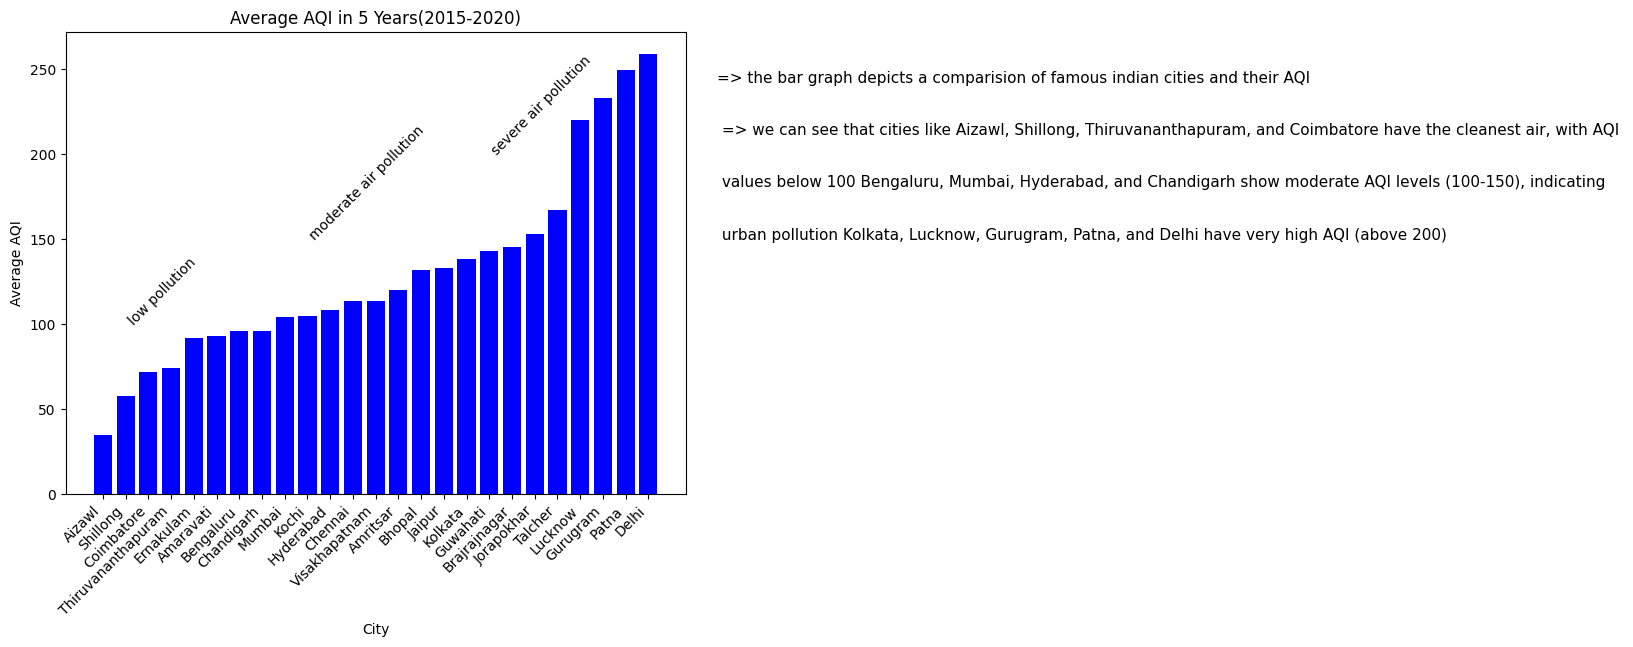

In [ ]:
aqi_data = df_Aqi.groupby('City')['AQI'].mean().sort_values()
aqi_data = aqi_data[aqi_data.index != 'Ahmedabad']
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(aqi_data.index, aqi_data.values, color="blue")

ax.set_title('Average AQI in 5 Years(2015-2020)')
ax.set_xlabel('City')
ax.set_ylabel('Average AQI')
ax.set_xticklabels(aqi_data.index, rotation=45, ha='right')
plt.text(1,100,"low pollution",rotation=45)
plt.text(9,150,"moderate air pollution",rotation=45)
plt.text(17,200,"severe air pollution",rotation=45)
plt.text(27,150,"=> the bar graph depicts a comparision of famous indian cities and their AQI\n\n\n => we can see that cities like Aizawl, Shillong, Thiruvananthapuram, and Coimbatore have the cleanest air, with AQI \n\n\n values below 100 Bengaluru, Mumbai, Hyderabad, and Chandigarh show moderate AQI levels (100-150), indicating \n\n\n urban pollution Kolkata, Lucknow, Gurugram, Patna, and Delhi have very high AQI (above 200)",fontsize=11)
plt.show()

<ipython-input-28-c53e4415e143>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df_filtered.groupby('City').resample('Y').mean().reset_index()


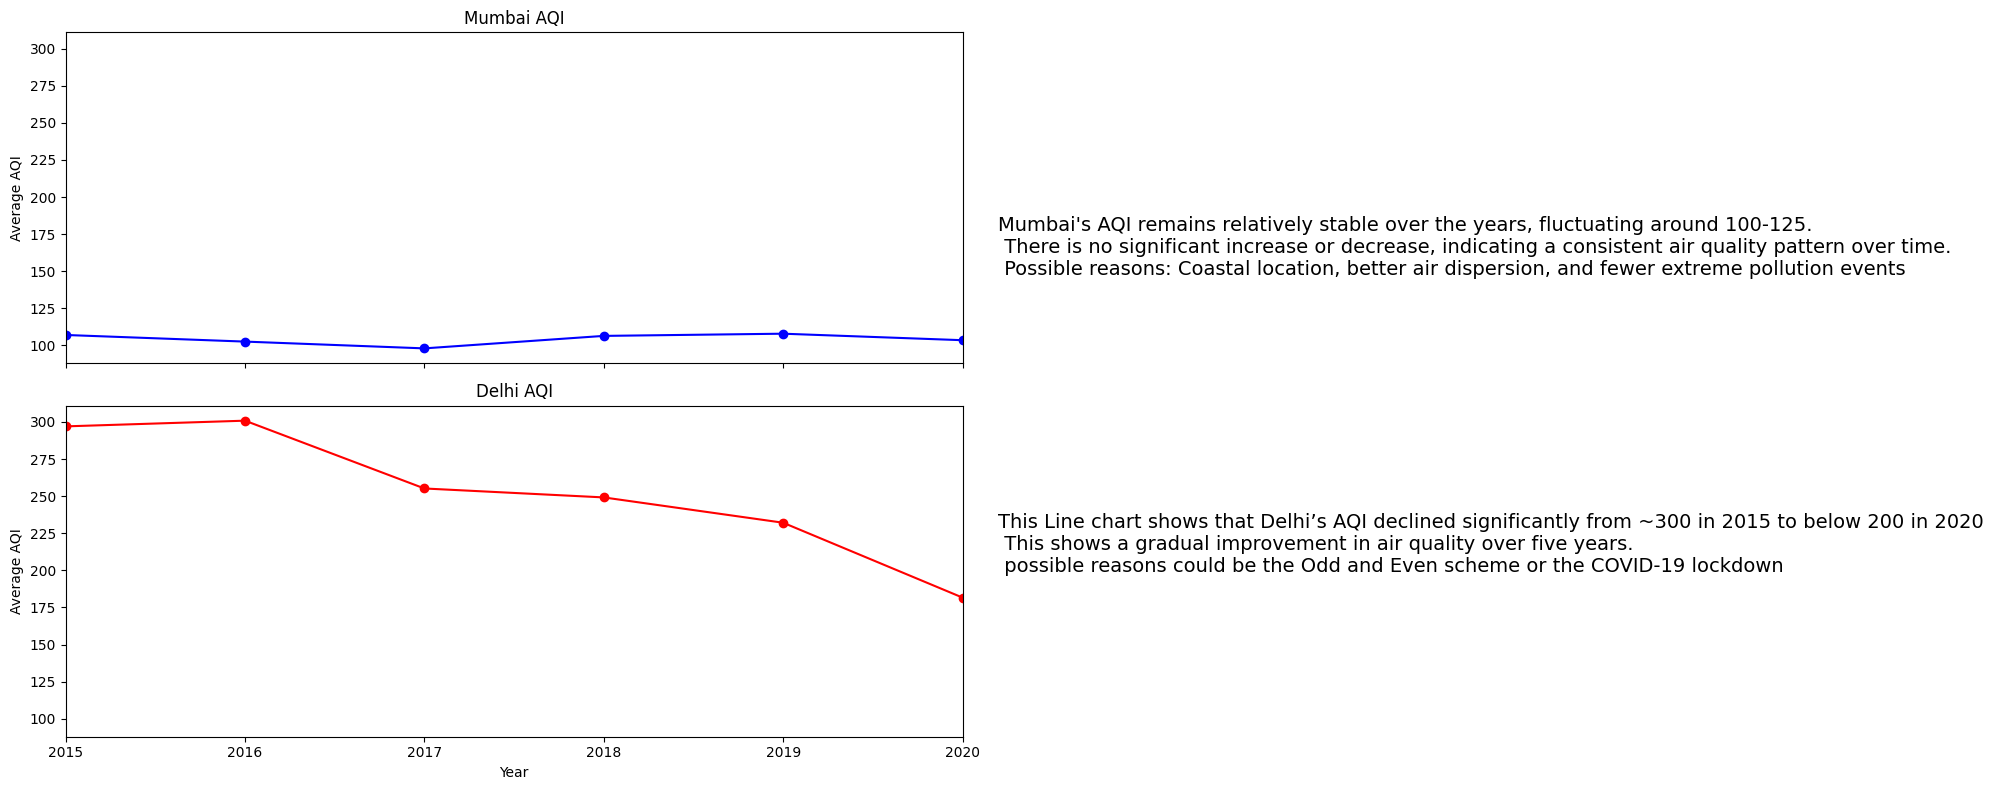

In [ ]:
df_filtered = df_Aqi[df_Aqi['City'].isin(['Mumbai', 'Delhi'])].copy()
df_filtered = df_filtered[['City', 'AQI']]
df_yearly = df_filtered.groupby('City').resample('Y').mean().reset_index()
df_pivot = df_yearly.pivot(index='Date', columns='City', values='AQI')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True, sharey=True)

df_pivot['Mumbai'].plot(ax=axes[0], marker='o', linestyle='-', color='b', title="Mumbai AQI")
axes[0].set_ylabel("Average AQI")

df_pivot['Delhi'].plot(ax=axes[1], marker='o', linestyle='-', color='r', title="Delhi AQI")
axes[1].set_ylabel("Average AQI")
axes[1].set_xlabel("Year")
plt.tight_layout()
plt.text(50.2,199,"This Line chart shows that Delhi’s AQI declined significantly from ~300 in 2015 to below 200 in 2020\n This shows a gradual improvement in air quality over five years.\n possible reasons could be the Odd and Even scheme or the COVID-19 lockdown", fontsize=14)
plt.text(50.2,399,"Mumbai's AQI remains relatively stable over the years, fluctuating around 100-125.\n There is no significant increase or decrease, indicating a consistent air quality pattern over time.\n Possible reasons: Coastal location, better air dispersion, and fewer extreme pollution events", fontsize=14)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df_delhi = df_Aqi[df_Aqi['City'] == 'Delhi'].copy()
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

<ipython-input-32-4a30d4d05020>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_delhi[pollutants].resample('M').mean()


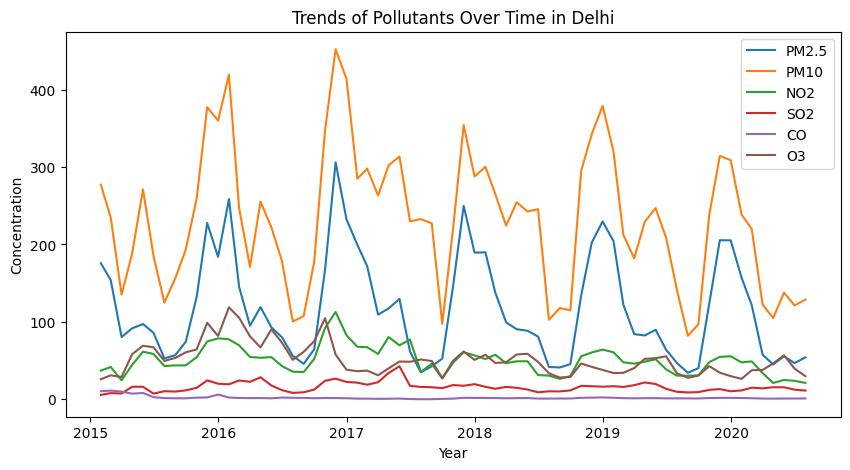

In [ ]:
df_resampled = df_delhi[pollutants].resample('M').mean()

plt.figure(figsize=(10, 5))
for pollutant in pollutants:
    plt.plot(df_resampled.index, df_resampled[pollutant], label=pollutant)

plt.xlabel("Year")
plt.ylabel("Concentration")
plt.title("Trends of Pollutants Over Time in Delhi")
plt.legend()
plt.show()


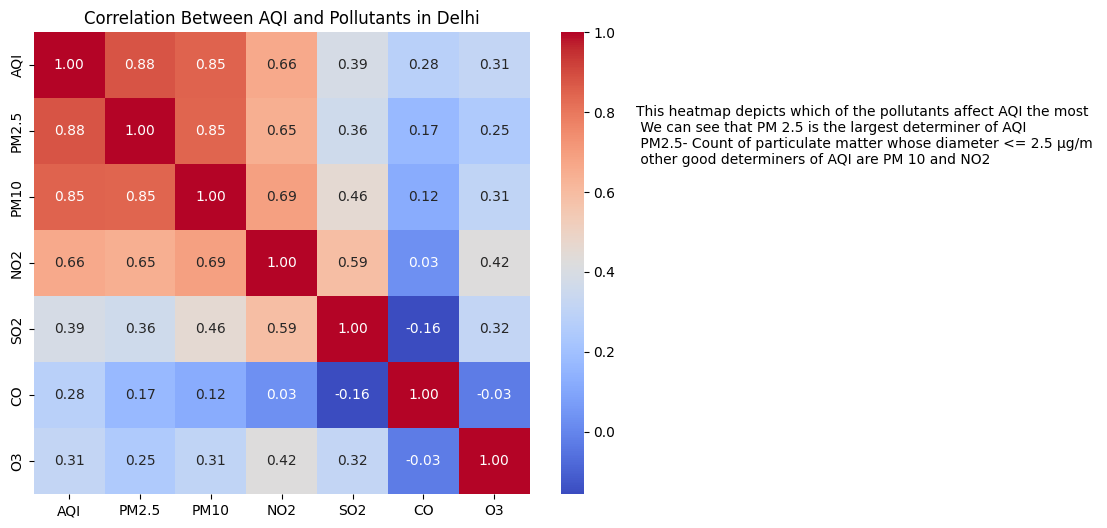

In [ ]:
corr = df_delhi[['AQI'] + pollutants].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between AQI and Pollutants in Delhi")
plt.text(8.5,2,"This heatmap depicts which of the pollutants affect AQI the most \n We can see that PM 2.5 is the largest determiner of AQI \n PM2.5- Count of particulate matter whose diameter <= 2.5 µg/m \n other good determiners of AQI are PM 10 and NO2")
plt.show()


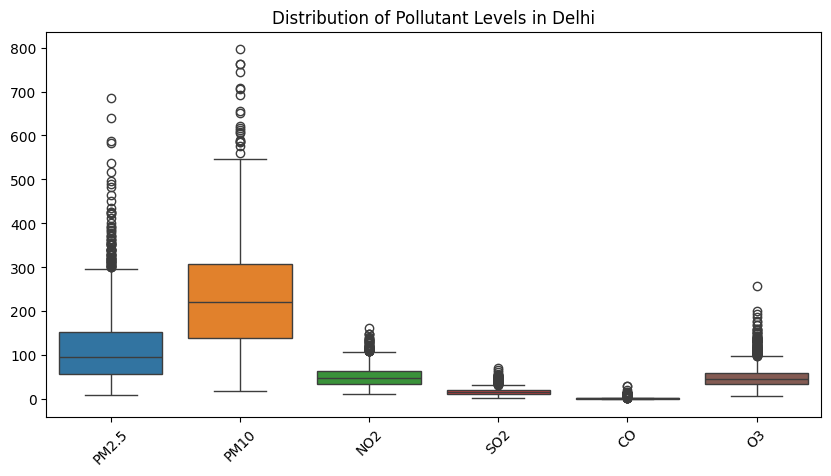

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_delhi[pollutants])
plt.xticks(rotation=45)
plt.title("Distribution of Pollutant Levels in Delhi")
plt.show()


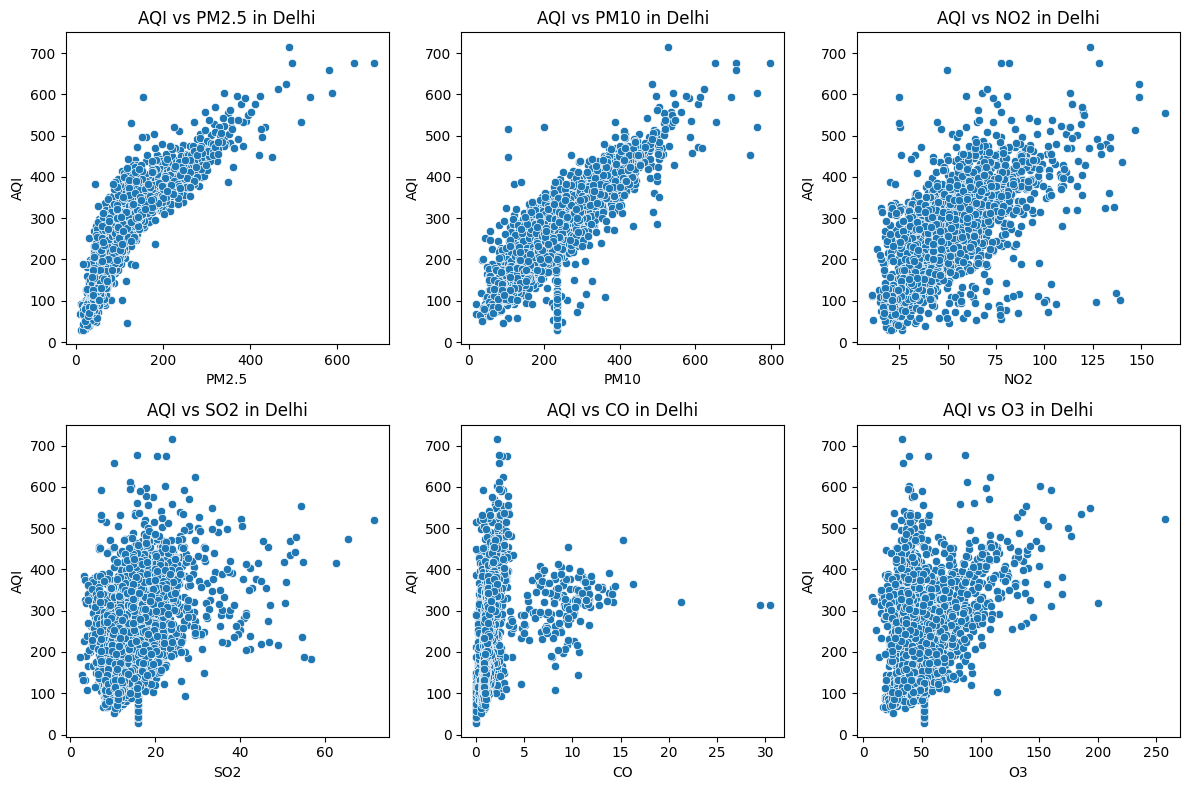

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, pollutant in enumerate(pollutants):
    ax = axes[i//3, i%3]
    sns.scatterplot(data=df_delhi, x=pollutant, y='AQI', ax=ax)
    ax.set_title(f"AQI vs {pollutant} in Delhi")

plt.tight_layout()
plt.show()


# 🌲 What is Random Forest?

"""
Random Forest is an ensemble machine learning algorithm that builds multiple decision trees
and combines their outputs to improve predictive accuracy and control overfitting.

It belongs to the family of bagging methods (Bootstrap Aggregation), where:
- Each tree is trained on a random sample of the data (with replacement).
- Random subsets of features are selected when splitting nodes.
- Final prediction is made by majority vote (classification) or averaging (regression).

Random Forest is robust, handles missing data, and works well on both classification and regression tasks.
"""

# ✅ Key Highlights of Random Forest

"""
- Ensemble of Decision Trees: Trains multiple decision trees on different subsets of the data.
- Reduces Overfitting: By averaging or majority voting, it reduces the variance of individual trees.
- Feature Randomness: Adds randomness by selecting a subset of features for each tree split.
- High Accuracy: Especially effective on structured data and less sensitive to noisy data.
- Non-linear: Can model complex decision boundaries without assuming linearity.
"""

# 🧮 Mathematical Summary of Random Forest

"""
Given:
- Training dataset: D = {(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)}
- Number of trees: T

1. For each tree t in 1 to T:
   - Sample with replacement: Dᵗ ⊂ D
   - Build a decision tree hₜ(x) on Dᵗ using a random subset of features at each split.

2. Aggregation:
   - Classification: Final prediction ŷ = mode(h₁(x), h₂(x), ..., hₜ(x))
   - Regression: Final prediction ŷ = (1/T) * Σₜ hₜ(x)

Key Formula (Regression):
ŷ = (1/T) * ∑ hₜ(x)

Key Formula (Classification):
ŷ = majority_vote(h₁(x), h₂(x), ..., hₜ(x))
"""

# 📌 How is Random Forest Used?

"""
Random Forest is commonly used for supervised learning problems and is effective in real-world applications like fraud detection, medical diagnosis, and customer churn prediction.

1. Data Preparation:
   - Suitable for both numeric and categorical features.
   - Typically requires less preprocessing compared to other models.
   - Handles missing values internally.

2. Model Selection:
   - Use `RandomForestClassifier` for classification and `RandomForestRegressor` for regression.
   - Set key parameters like `n_estimators`, `max_depth`, `max_features`, and `min_samples_split`.

3. Training:
   - Multiple decision trees are built using bootstrapped datasets and random feature selection.
   - Each tree learns different patterns and captures different parts of the data distribution.

4. Validation & Tuning:
   - Validate performance using cross-validation or hold-out datasets.
   - Tune hyperparameters using grid search or random search to optimize accuracy and control overfitting.

5. Prediction:
   - For classification, outputs the majority class predicted by individual trees.
   - For regression, outputs the average of predictions from all trees.

6. Interpretation:
   - Provides feature importance scores based on how often a feature is used to split the data across trees.
   - Though less interpretable than single decision trees, it still allows some insights into variable importance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('AQI.csv')  # If it's not CSV, tell me the format

# Preview and check for nulls
print(df.head())
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()

# Select features and target
X = df.drop('AQI', axis=1)  # Replace 'AQI' with your actual target column
y = df['AQI']

# Encode categorical variables if any
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=50)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2      

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.6 MB/s eta 0:00:00


In [ ]:
import datetime

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import datetime

# Load dataset
df = pd.read_csv("AQI.csv")
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Drop missing AQI values
df = df.dropna(subset=['aqi'])

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Extract date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Show list of unique cities
cities = sorted(df['city'].unique())
print("Available Cities:\n", cities)

# Take user input
selected_city = input("Enter the name of the city from above list: ")
future_input_str = input("Enter future date in YYYY-MM-DD format: ")

# Parse input date
future_date = datetime.datetime.strptime(future_input_str, "%Y-%m-%d")

# Filter data
city_df = df[df['city'] == selected_city]

# Prepare training data
X = city_df[['year', 'month', 'day']]
y = city_df['aqi']

# Train model
model = RandomForestRegressor()
model.fit(X, y)

# Prepare prediction input
future_input = pd.DataFrame([{
    'year': future_date.year,
    'month': future_date.month,
    'day': future_date.day
}])

# Predict AQI
predicted_aqi = model.predict(future_input)[0]
print(f"\nPredicted AQI for {selected_city} on {future_input_str} is: {predicted_aqi:.2f}")


Available Cities:
 ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']
Enter the name of the city from above list: Chennai
Enter future date in YYYY-MM-DD format: 2025-06-20

Predicted AQI for Chennai on 2025-06-20 is: 139.85


In [ ]:
df=df_Aqi

In [ ]:
import pandas as pd
import datetime
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Add synthetic date if not present
if 'Date' not in df.columns:
    df['Date'] = pd.date_range(start='2015-01-01', periods=len(df), freq='D')

# Extract date features
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Encode city names
city_encoder = LabelEncoder()
df['City_encoded'] = city_encoder.fit_transform(df['City'])

# Define features and targets
features = ['year', 'month', 'day', 'City_encoded']
targets = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
           'Benzene', 'Toluene', 'Xylene', 'AQI']

# Drop rows where all targets are missing
df = df.dropna(subset=targets, how='all')

# Impute missing values in targets using KNN
imputer = KNNImputer(n_neighbors=5)
Y_imputed = pd.DataFrame(imputer.fit_transform(df[targets]), columns=targets)

# Scale input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
X = pd.DataFrame(X_scaled, columns=features)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_imputed, test_size=0.2, random_state=42)

# Train RandomForest model with optimized parameters
model = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=400, max_depth=25, min_samples_split=5,
    min_samples_leaf=3, random_state=42, n_jobs=-1
))
model.fit(X_train, Y_train)

# Evaluate model
Y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# User prediction
print("\nAvailable cities:\n", sorted(df['City'].unique()))
selected_city = input("\nEnter city name from above list: ").strip()
future_input_str = input("Enter future date (YYYY-MM-DD): ").strip()

try:
    future_date = datetime.datetime.strptime(future_input_str, "%Y-%m-%d")
    city_code = city_encoder.transform([selected_city])[0]

    # Create a DataFrame with input features
    input_features = pd.DataFrame([{
        'year': future_date.year,
        'month': future_date.month,
        'day': future_date.day,
        'City_encoded': city_code
    }])

    # Scale input features and predict (fixed warning issue)
    input_scaled_array = scaler.transform(input_features)
    input_scaled_df = pd.DataFrame(input_scaled_array, columns=features)
    prediction = model.predict(input_scaled_df)[0]

    print(f"\nPredicted air quality parameters for {selected_city} on {future_input_str}:\n")
    for target, value in zip(targets, prediction):
        print(f"{target}: {value:.2f}")

except Exception as e:
    print("\nError:", e)
    print("Please ensure the city is spelled exactly as shown and date is in YYYY-MM-DD format.")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 7.65
Mean Squared Error (MSE): 534.16
Root Mean Squared Error (RMSE): 23.11
R² Score: 0.7363

Available cities:
 ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']

Enter city name from above list: Chennai
Enter future date (YYYY-MM-DD): 2025-06-20

Predicted air quality parameters for Chennai on 2025-06-20:

PM2.5: 73.73
PM10: 163.73
NO: 4.48
NO2: 17.69
NOx: 12.53
NH3: 16.42
CO: 7.56
SO2: 14.13
O3: 24.67
Benzene: 15.00
Toluene: 23.15
Xylene: 7.02
AQI: 125.82


# 🌟 What is XGBoost?

"""
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting machines (GBMs).

It is designed for speed and performance and is widely used in machine learning competitions and production systems.

XGBoost builds decision trees sequentially, where each new tree tries to correct the residuals (errors) of the previous trees.

Key characteristics:
- Uses both first-order (gradient) and second-order (hessian) derivatives for optimization.
- Employs regularization to control overfitting.
- Supports parallel tree construction, missing value handling, and is highly efficient on large datasets.
"""

# ✅ Key Highlights of XGBoost

"""
- XGBoost uses second-order optimization (gradients and hessians).
- It regularizes both tree complexity and leaf scores.
- Each tree is added sequentially to reduce the residuals of the previous trees.
- It uses a greedy algorithm to find the best splits using the gain formula.
- It's very efficient and accurate, especially on tabular data.
"""

# 📌 How is XGBoost Used?

"""
XGBoost is primarily used for supervised learning tasks, including classification, regression, and ranking.
It is especially effective on structured/tabular data. Here’s how it's typically used:

1. Data Preparation:
   - The dataset must be in a tabular format (rows = samples, columns = features).
   - XGBoost performs better with numeric features, so categorical variables are usually encoded (e.g., one-hot or label encoding).
   - Missing values can be automatically handled by XGBoost without needing explicit imputation.

2. Model Selection:
   - Choose the appropriate model type: `XGBClassifier` for classification or `XGBRegressor` for regression.
   - Customize with hyperparameters such as `learning_rate`, `max_depth`, `n_estimators`, and regularization parameters (`lambda`, `alpha`).

3. Training:
   - The model is trained on a dataset where it iteratively builds decision trees.
   - Each new tree corrects the residuals of previous predictions.
   - It calculates gradients and hessians of the loss function to guide learning.

4. Validation & Tuning:
   - Model performance is evaluated on a validation dataset using metrics like accuracy, precision, RMSE, or log loss.
   - Hyperparameters can be fine-tuned using techniques like grid search or randomized search.

5. Prediction:
   - After training, the model is used to make predictions on new or unseen data.
   - It outputs class labels or probabilities for classification and continuous values for regression.

6. Interpretation:
   - XGBoost provides feature importance scores to show which features influence predictions the most.
   - Tools like SHAP (SHapley Additive exPlanations) can be used to interpret individual predictions.



In [ ]:
pip install xgboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('AQI.csv')  # Adjust if your data format is different

# Preview and check for nulls
print(df.head())
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()

# Select features and target
X = df.drop('AQI', axis=1)  # Replace 'AQI' with your actual target column
y = df['AQI']

# Encode categorical variables if any
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2      

# 📈 What is Linear Regression?

"""
Linear Regression is one of the most fundamental and interpretable algorithms in machine learning.

It models the relationship between a dependent variable (target) and one or more independent variables (features)
by fitting a straight line (in higher dimensions, a hyperplane) that minimizes the difference between the predicted
and actual values.

It is used for predicting continuous numerical values.
"""

# ✅ Key Highlights of Linear Regression

"""
- Simple and interpretable model.
- Assumes a linear relationship between features and target.
- Can be extended to multiple features (Multiple Linear Regression).
- Can be regularized (Ridge, Lasso) to handle multicollinearity and overfitting.
- Suitable for regression tasks on numeric/tabular data.
"""

# 🧮 Mathematical Formulation

"""
Given:
- Feature matrix: X ∈ ℝⁿˣᵖ (n samples, p features)
- Target vector: y ∈ ℝⁿ
- Coefficients: w ∈ ℝᵖ
- Intercept: b ∈ ℝ

The hypothesis function:
    ŷ = Xw + b

Loss function (Mean Squared Error):
    L(w, b) = (1/n) * Σ (yᵢ - ŷᵢ)²
           = (1/n) * Σ (yᵢ - (Xᵢ·w + b))²

Goal:
- Minimize the MSE loss with respect to weights w and bias b.
- The optimal solution has a closed-form for ordinary least squares:

Closed-form solution (normal equation):
    w = (XᵗX)⁻¹Xᵗy
"""

# 📌 How is Linear Regression Used?

"""
Linear Regression is used for tasks where the goal is to predict a continuous numeric output.

1. Data Preparation:
   - Ensure linear relationship between features and target.
   - Features should be numeric. Categorical variables must be encoded.
   - It helps to scale features, especially when using regularization.

2. Model Training:
   - The algorithm finds the best-fit line by minimizing the mean squared error between predicted and actual values.
   - Can use gradient descent or closed-form solution (normal equation).

3. Prediction:
   - Once trained, the model predicts outcomes by plugging feature values into the learned equation ŷ = Xw + b.

4. Evaluation:
   - Common metrics: R² (coefficient of determination), Mean Squared Error (MSE), Mean Absolute Error (MAE).
   - Residual plots and Q-Q plots can be used to assess the assumptions of linearity and normality of errors.

5. Interpretation:
   - Coefficients indicate the strength and direction of the relationship between each feature and the target.
   - Intercept is the expected output when all features are zero.

Extensions:
- **Ridge Regression**: Adds L2 penalty to reduce overfitting.
- **Lasso Regression**: Adds L1 penalty to encourage sparsity.

In [ ]:
df_Aqi = df_Aqi.dropna(subset=["AQI"])
features = ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
            'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

X = df_Aqi[features]
y = df_Aqi[target]


categorical_features = ['City']
numerical_features = [f for f in features if f not in categorical_features]


numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features),
                  ('cat', categorical_transformer, categorical_features)
                 ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2_score = model.score(X_test, y_test)

print(f"Model trained. RMSE: {rmse:.2f}")
print(f"R-squared: {r2_score:.2f}")

def predict_aqi_by_city_and_pm(city, pm25, pm10):
    city_data = df_Aqi[df_Aqi['City'] == city]


    if city_data.empty:
        return f"No data available for city: {city}"

    city_avg_data = city_data[numerical_features].mean()
    input_data = pd.DataFrame({
        'City': [city],
        'PM2.5': [pm25],
        'PM10': [pm10],
        'NO': [city_avg_data['NO']],
        'NO2': [city_avg_data['NO2']],
        'NOx': [city_avg_data['NOx']],
        'NH3': [city_avg_data['NH3']],
        'CO': [city_avg_data['CO']],
        'SO2': [city_avg_data['SO2']],
        'O3': [city_avg_data['O3']],
        'Benzene': [city_avg_data['Benzene']],
        'Toluene': [city_avg_data['Toluene']],
        'Xylene': [city_avg_data['Xylene']]
    })

    predicted_aqi = model.predict(input_data)

    return predicted_aqi[0]

city = "Delhi"
pm25 = 60
pm10 = 100

predicted_aqi = predict_aqi_by_city_and_pm(city, pm25, pm10)
print(f"The predicted AQI for {city} with PM2.5 = {pm25} and PM10 = {pm10} is: {predicted_aqi:.2f}")



Model trained. RMSE: 50.36
R-squared: 0.85
The predicted AQI for Delhi with PM2.5 = 60 and PM10 = 100 is: 156.11
